# Analiza Tour de France 2022

Analizirali bomo statistiko kolesarske dirke po Franciji iz leta 2022. Podatki so bili zajeti iz strani [Pro Cycling Stats](https://www.procyclingstats.com/race/tour-de-france/2022) in obdelani s pomočjo pythona.

## Uvod

*Tour de France* ali *Dirka po Franciji* je vsakoletna kolesarska cestna dirka, ki traja 3 tedne in pelje kolesarje, kot je očitno iz imena, večinoma po Francoskih pokrajinah.

Ponavadi sodeluje med 20 in 22 ekip *(ang. teams)*, vsaka sestavljena iz 8 kolesarjev.

Razdeljena je v 21 posameznih enodnevnih dirk ali etap *(ang. stages)*, katerih točne poti se vsako leto spremenijo, vendar vedno seštejejo v pribljižno 3500 km.

Vsaka etapa ima svojega zmagovalca, ki jo je prekolesrail v najmanjšem času, končni zmagovalec dirke pa je tisti, katerega skupni čas vseh etap je najmanjši. Zmagovalno ekipo se določi glede na čase najhitrejših treh članov ekipe v vsaki etapi.

Zdaj, ko vemo osnove, moramo podatke uvoziti. 

In [79]:
import pandas as pd
from functools import reduce

%matplotlib inline

kolesarji = pd.read_csv('csv_datoteke/kolesarji.csv', index_col='id')
etape = pd.read_csv('csv_datoteke/podatki_o_etapah.csv', index_col='št')
rezultati_etap = []
for e in range(21):
    rezultati_etap.append(pd.read_csv(f'csv_datoteke/etapa{e}.csv', index_col='id'))

pd.options.display.max_rows = 10

Najprej si oglejmo naše kolesarje in njihove podatke:

In [80]:
kolesarji

,ime,država,tip,ekipa,starost,teža,višina,ODR,GC,TT,Sprint,Climber
id,,,,,,,,,,,,
56,Yves Lampaert,be,Classic,Quick-Step Alpha Vinyl Team,31,75kg,1.80m,3156,1199,2215,1660,792
16,Wout Van Aert,be,Classic,Jumbo-Visma,27,78kg,1.90m,6290,941,2466,1772,3995
1,Tadej Pogacar,si,Climber,UAE Team Emirates,23,66kg,1.76m,3781,5194,1821,226,7108
24,Filippo Ganna,it,TT,INEOS Grenadiers,25,83kg,1.93m,495,673,4228,192,505
101,Mathieu Van Der Poel,nl,Classic,Alpecin-Deceuninck,27,75kg,1.84m,4999,984,906,1384,2398
...,...,...,...,...,...,...,...,...,...,...,...,...
174,Alex Kirsch,lu,TT,Trek - Segafredo,30,78kg,1.94m,458,357,579,506,321
195,Guy Niv,il,GC,Israel - Premier Tech,28,58kg,1.68m,27,169,55,2,40
217,Pierre Rolland,fr,Climber,B&B Hotels - KTM,35,70kg,1.84m,502,3339,250,534,3831


Id je številka ki jo ima kolesar na dresu. Tip kolesarja pa predstavlja v kateri kategoriji je kolesar najboljši. Imamo več kategorij, saj je relief etape vsak dan malo drugačen, na par etapah pa se tudi način merjenja časa popolnoma spremeni, več o tem kasneje, zaenkrat je le pomembno da vemo da kolesarji nabirajo točke v kategorijah ODR (one day races ali enodnevne dirke), GC (general classification ali splošno razvrščanje), TT (time trial ali kronometer), Sprint (šprint) in Climber (plezalec).

V vsaki kategoriji pridobijo točke, ko so na dirki, ki spada v to kategorijo, dovolj visoko uvrščeni.

Oglejmo si torej podatke o naših etapah, da ugotovimo katere od kategorij so prisotne na Tour de France.

In [81]:
etape

,avg speed,dolžina,strmost,točke terena,višinci,won how
št,,,,,,
1,51.821,13.2,1,0,21,Time Trial
2,44.186,202.2,1,11,1149,Sprint of large group
3,43.411,182.0,1,16,1280,Sprint of large group
4,42.591,171.5,1,63,1785,11.6 km solo
5,48.661,157.0,1,1,601,Sprint of small group
...,...,...,...,...,...,...
17,37.806,129.7,5,324,3364,Sprint à deux
18,35.825,143.2,5,408,4036,3.6 km solo
19,48.684,188.3,3,35,1316,0.4 km solo


Vidimo torej povprečno hitrost zmagovalca (avg speed), dolžino etape, strmost na lestvici 1-5, ki je določena glede na teren in je na spletni strani [Pro Cycling Stats](https://www.procyclingstats.com/race/tour-de-france/2022) označena z ikono, točke terena, prekolesarjeni višinci in won how ali način zmage, ki se mu bomo bolj posvetili kasneje.

Za zdaj si še oglejmo združene rezultate etap:

In [82]:
rezultati = reduce(lambda left,right: pd.merge(left, right, on = ['id'], how='outer'), rezultati_etap)
rezultati["skupni čas"] = rezultati.sum(axis='columns', min_count=21)

In [83]:
rezultati.sort_values('skupni čas')

,čas1,čas2,čas3,čas4,čas5,čas6,čas7,čas8,čas9,čas10,...,čas13,čas14,čas15,čas16,čas17,čas18,čas19,čas20,čas21,skupni čas
id,,,,,,,,,,,,,,,,,,,,,
18,0.26,4.58,4.19,4.03,3.24,4.45,3.98,4.22,4.79,3.46,...,4.31,4.72,4.46,4.49,3.43,4.00,3.87,0.81,2.99,79.56
1,0.26,4.58,4.19,4.03,3.24,4.45,3.98,4.22,4.79,3.46,...,4.31,4.72,4.46,4.49,3.43,4.01,3.87,0.81,2.98,79.61
21,0.26,4.58,4.19,4.03,3.24,4.46,3.98,4.22,4.79,3.46,...,4.31,4.73,4.46,4.49,3.47,4.05,3.87,0.81,2.98,79.69
91,0.27,4.58,4.19,4.03,3.24,4.45,3.98,4.22,4.79,3.46,...,4.31,4.73,4.46,4.49,3.49,4.05,3.87,0.85,2.98,79.76
41,0.26,4.58,4.19,4.03,3.24,4.46,4.01,4.22,4.80,3.46,...,4.31,4.73,4.46,4.42,3.49,4.06,3.87,0.85,2.98,79.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.28,4.58,4.20,4.03,3.30,4.56,4.03,4.25,4.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.28,4.71,4.20,4.09,3.42,4.71,4.36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,0.29,4.58,4.25,4.09,3.47,4.62,4.27,4.41,5.24,3.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Osnovne povezave med podatki

V tabeli etape opazimo, da se zdijo strmost, točke terena in višinci sorazmerni, kar bi bilo logično, saj vsi rastejo z razgibanostjo terena. Pa še preverimo če to res drži:

<Axes: xlabel='strmost', ylabel='višinci'>

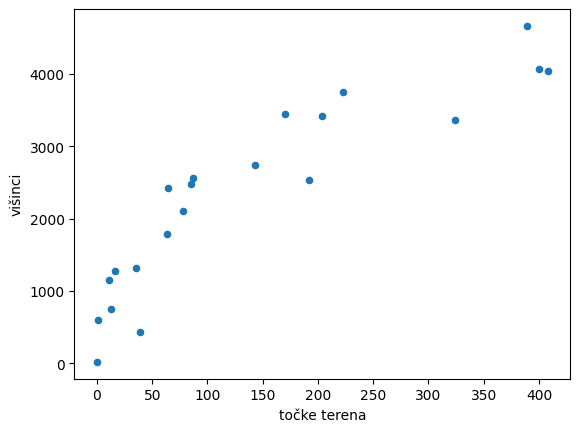

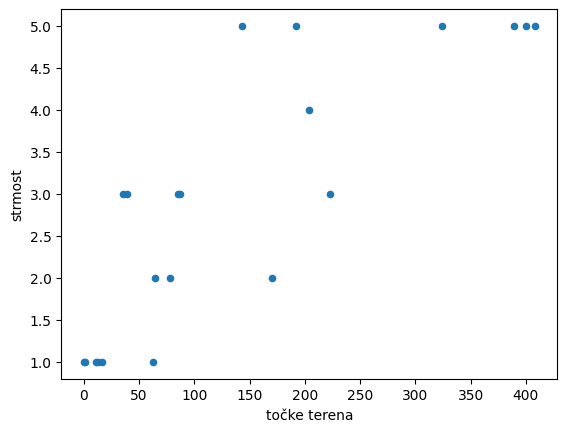

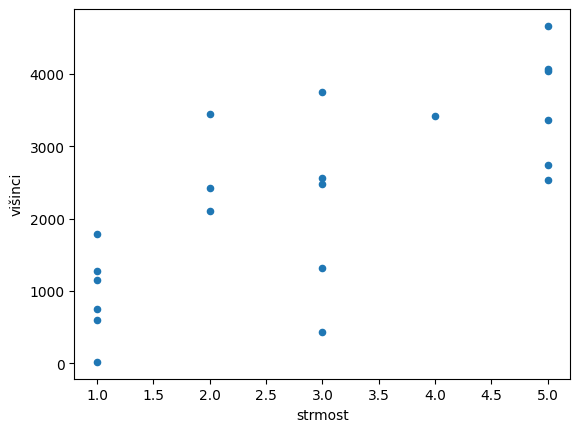

In [87]:
etape.plot.scatter(x='točke terena', y='višinci')
etape.plot.scatter(x='točke terena', y='strmost')
etape.plot.scatter(x='strmost', y='višinci')

Res izgleda da so vse tri sorazmerne, najlepše pa se to vidi na grafu med višinci in točkami terena. Torej lahko v prihodnje uprabljamo le eno od njih.